<font size="4">

Genera un dataset ficticio con 500 estudiantes. Cada uno tiene:
- horas_estudio: de 0 a 20 horas por semana.
- asistencia: entre 50% y 100%.
- tipo_escuela: Pública o Privada.
- extraescolares: Sí o No.
- rendimiento: será calculado después (target).

**¿Qué conseguimos con un dataset simulado?**

- Control total sobre las variables: puedes decidir qué influye en qué.
- Facilidad para enseñar: puedes crear relaciones claras y coherentes.
- Reproducibilidad: todos los estudiantes verán exactamente los mismos datos si usas set.seed().
- Seguridad y privacidad: no manejas datos sensibles o reales.

**¿Por qué 500 estudiantes?**
- Es un número suficientemente grande para aplicar modelos estadísticos y de machine learning.
- No es tan grande como para que el procesamiento en Colab sea lento.

**Aplicación didáctica**
- Puedes cambiar las reglas y ver cómo cambian los resultados del modelo.
- Permite enseñar conceptos como correlación, causalidad, inferencia bayesiana, etc.
- Es una forma segura y realista de simular situaciones educativas.

In [29]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from torch.utils.hipify.hipify_python import preprocessor

# Semilla para reproducibilidad
np.random.seed(42)
n = 500

# Crear el DataFrame
data = pd.DataFrame({
    'horas_estudio': np.random.choice(np.arange(0, 21), size=n, replace=True),
    'asistencia': np.random.choice(np.arange(50, 101), size=n, replace=True),
    'tipo_escuela': np.random.choice(['Pública', 'Privada'], size=n, p=[0.3, 0.7]),
    'extraescolares': np.random.choice(['Sí', 'No'], size=n, p=[0.5, 0.5])
})

# Definir la variable 'rendimiento' de forma condicional
def calcular_rendimiento(row):
    if row['horas_estudio'] > 10 and row['asistencia'] > 80 and row['tipo_escuela'] == 'Privada':
        return 'Alto'
    elif row['horas_estudio'] > 5 and row['asistencia'] > 70:
        return 'Medio'
    else:
        return 'Bajo'

data['rendimiento'] = data.apply(calcular_rendimiento, axis=1)

# Convertir columnas categóricas a tipo 'category'
data['tipo_escuela'] = data['tipo_escuela'].astype('category')
data['extraescolares'] = data['extraescolares'].astype('category')
data['rendimiento'] = data['rendimiento'].astype('category')

# Mostrar resumen del dataset
print(data.describe(include='all'))


        horas_estudio  asistencia tipo_escuela extraescolares rendimiento
count       500.00000  500.000000          500            500         500
unique            NaN         NaN            2              2           3
top               NaN         NaN      Privada             No        Bajo
freq              NaN         NaN          346            250         308
mean          9.60000   74.380000          NaN            NaN         NaN
std           6.32709   15.020214          NaN            NaN         NaN
min           0.00000   50.000000          NaN            NaN         NaN
25%           4.00000   61.000000          NaN            NaN         NaN
50%           9.00000   74.500000          NaN            NaN         NaN
75%          15.00000   87.000000          NaN            NaN         NaN
max          20.00000  100.000000          NaN            NaN         NaN


In [30]:
# Redefinir la lógica para rendimiento
def calcular_rendimiento(row):
    if row['horas_estudio'] > 15 and row['asistencia'] > 90 and row['tipo_escuela'] == 'Privada':
        return 'Alto'
    elif row['horas_estudio'] >= 10 and row['asistencia'] >= 75:
        return 'Medio'
    else:
        return 'Bajo'

# Aplicar la lógica
data['rendimiento'] = data.apply(calcular_rendimiento, axis=1)

# Convertir a categoría
data['rendimiento'] = data['rendimiento'].astype('category')

# Ver resumen (conteo por clase)
print(data['rendimiento'].value_counts())


rendimiento
Bajo     376
Medio    109
Alto      15
Name: count, dtype: int64


<font size="4">

Antes de meternos con el análisis de las columnas y de sus relaciones entre sí, procedemos a extraer cierta información del dataset. Tal y como podemos ver a continuación,se trata de un dataset de 500 registros con 5 columnas, de las cuales 2 son de tipo numérica y las otras tres restantes son de tipo categórica. Después, podemos apreciar que no hay valores nulos en el dataset, lo cual es bueno, ya que no tendríamos que eliminar o aplicar valores como la media, mediana... a dichos valores nulos.

In [31]:
# tamaño del dataset
data.shape

(500, 5)

In [32]:
data.head()

,horas_estudio,asistencia,tipo_escuela,extraescolares,rendimiento
0,6,56,Privada,Sí,Bajo
1,19,77,Pública,No,Medio
2,14,63,Pública,Sí,Bajo
3,10,80,Pública,No,Medio
4,7,68,Privada,Sí,Bajo


In [33]:
# información resumida sobre las variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   horas_estudio   500 non-null    int64   
 1   asistencia      500 non-null    int64   
 2   tipo_escuela    500 non-null    category
 3   extraescolares  500 non-null    category
 4   rendimiento     500 non-null    category
dtypes: category(3), int64(2)
memory usage: 9.8 KB


In [34]:
# resumen de las variables numéricas
data.describe()

,horas_estudio,asistencia
count,500.00000,500.000000
mean,9.60000,74.380000
std,6.32709,15.020214
min,0.00000,50.000000
25%,4.00000,61.000000
50%,9.00000,74.500000
75%,15.00000,87.000000
max,20.00000,100.000000


In [35]:
# comprobamos nulos
data.isnull().sum().sort_values(ascending=False)

horas_estudio     0
asistencia        0
tipo_escuela      0
extraescolares    0
rendimiento       0
dtype: int64

<font size="4">

# Análisis Exploratorio de Datos (EDA)

Dado este dataset, vamos a proceder a realizar el análisis exploratorio de los datos, en donde, vamos a poder comprender el significado de cada una de las variables y las relaciones que se establecen entre ellas.

Primeramente, nos centraremos en las variables de manera individual y, después, analizaremos las relaciones entre las distintas variables predictoras y la relaciones de estas con la variable objetivo (rendimiento).

In [36]:
# detectamos variables cualitativas y cuantitativas
var_cuantitativas = data.select_dtypes(include=["int", "float"]).columns.tolist()
var_cualitativas = data.select_dtypes(include=["category"]).columns.tolist()

print(f"Columnas numéricas: {var_cuantitativas}")
print(f"Columnas categorias: {var_cualitativas}")

Columnas numéricas: ['horas_estudio', 'asistencia']
Columnas categorias: ['tipo_escuela', 'extraescolares', 'rendimiento']


<font size="4">

Una vez ya tenemos divididas las variables numéricas de las variables categóricas, vamos a proceder a realizar un análisis cualitativo y cuantitativo, para ello, comenzaremos por el análisis de las cuantitativas.

### Análisis columnas cuantitativas

Para este análisis, vamos a centrarnos en las columnas de tipo numérico. Primero, representaremos un gráfico para ver como se distribuyen estos datos y así, ver la distribución que siguen estos. Algunos modelos de machine learning no funcionan correctamente si los datos están muy separados o, al contrario, con una varianza muy baja.

Tal y como podemos observar, la distribución de los datos de las columnas numéricas es homogénea, los datos no están sesgados. Esto se puede apreciar en la linea continua de cada gráfica, en donde, tiene unas ligeras subidas y bajadas. El sesgo se produce cuando al recoger una muestra, para una variable, hay más datos de una clase que de otra, por lo que esto podría afectar luego al rendimiento y a la predicción del modelo.

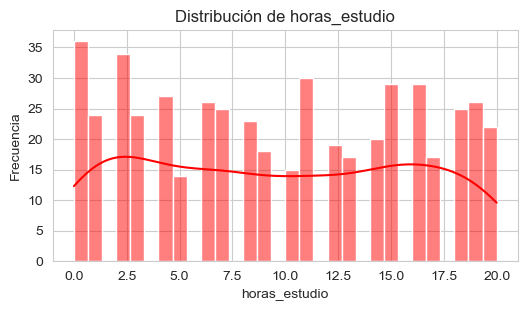

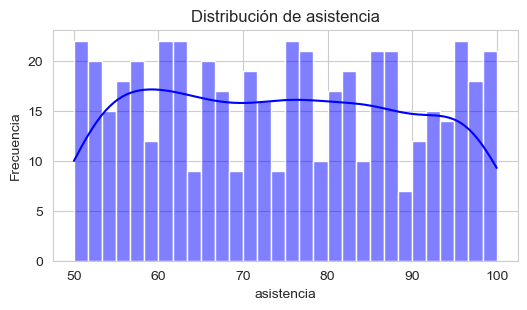

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

lista_columnas = data.select_dtypes(include=['int64', 'float64']).columns
colores = ['red', 'blue', 'green', 'orange', 'purple', 'cyan', 'magenta', 'brown', 'olive', 'pink']

for i, columna in enumerate(lista_columnas):
    plt.figure(figsize=(6, 3))
    color = colores[i % len(colores)]  # Para evitar errores si hay más columnas que colore
    sns.histplot(data[columna], kde=True, bins=30, color= color)
    plt.title(f'Distribución de {columna}')
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.show()

<font size="4">

### Análisis variable objetivo

Procedemos a analizar la variable objetivo, en donde, en este caso, se trata de una clasificación en tres clases:
- Bajo
- Medio
- Alto

Para ello, vamos a mostrar una gráfica para ver como se distribuyen las clases. Como se puede observar, la variable objetivo, formada por 3 clases, está muy desbalanceada, lo cual puede traer problemas a la hora de que en las predicciones clasifique bien la clase minoritaria.

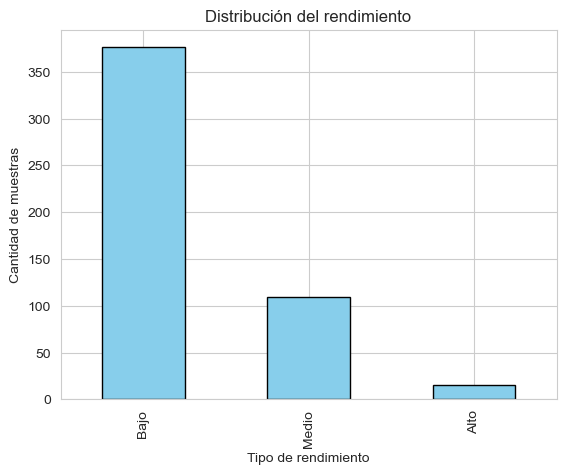

rendimiento
Bajo     376
Medio    109
Alto      15
Name: count, dtype: int64


In [38]:
# Contamos los valores únicos de la columna 'diagnosis'
conteo = data["rendimiento"].value_counts()

# Creamos el gráfico de barras
conteo.plot(kind='bar', color='skyblue', edgecolor='black')

# Añadimos títulos y etiquetas
plt.title("Distribución del rendimiento")
plt.xlabel("Tipo de rendimiento")
plt.ylabel("Cantidad de muestras")

# Mostramos el gráfico
plt.show()

# Mostramos cantidades
print(f"{data["rendimiento"].value_counts()}")

<font size="4">

### Análisis variables cualitativas

Ahora, vamos a proceder a analizar las variables cualitativas, en donde, seguiremos el mismo procedimiento, veremos como de distribuidos están los datos para cada una de las columnas.

Seguido a este código, se muestran las gráficas de distribución de las columnas categóricas. De ellas, sacamos las siguientes conclusiones:
- Tipo_escuela (privada/pública): la distribución de los estudiantes está desequilibrada, hay sesgo, ya que alrededor de 1/3 de los estudiantes va a la escuela pública, mientras que, 2/3 va a la privada.
- Extraescolares (si/no): esta clase está equilibrada al 50/50.
- Rendimiento (Bajo/Medio/Alto): es la columna objetivo, ya se ha explicado anteriormente.

tipo_escuela:
tipo_escuela
Privada    346
Pública    154
Name: count, dtype: int64
******************************
extraescolares:
extraescolares
No    250
Sí    250
Name: count, dtype: int64
******************************
rendimiento:
rendimiento
Alto      15
Bajo     376
Medio    109
Name: count, dtype: int64
******************************


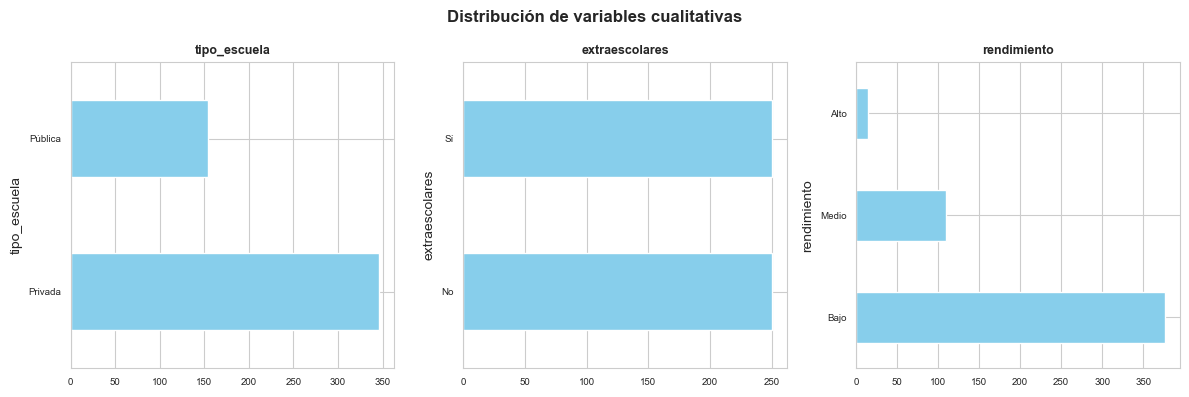

In [39]:
import matplotlib.pyplot as plt

var_cualitativas = data.select_dtypes(include=['category'])  

# Crear subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
axes = axes.flat

# Dibujar las gráficas
for i, colum in enumerate(var_cualitativas):
    data[colum].value_counts().plot.barh(ax=axes[i], color='skyblue')
    axes[i].set_title(colum, fontsize=9, fontweight="bold")
    axes[i].tick_params(labelsize=7)
    axes[i].set_xlabel("")

# Ajustar diseño
fig.tight_layout()
plt.subplots_adjust(top=0.85)
fig.suptitle('Distribución de variables cualitativas', fontsize=12, fontweight="bold")

# Mostrar densidad de valores
for columna in var_cualitativas:
    print(f"{columna}:\n{data[columna].value_counts().sort_index()}")
    print("*" * 30)


<font size="4">

### Análisis entre variables

Una vez hemos analizado las variables por separado, vamos a proceder a analizar las variables entre sí (correlación) y con respecto a la variable objetivo. Antes de nada, vamos a proceder a cambiar la columna objetivo, que es de tipo categórica ordinal, en numérica. Para ello, haremos las siguientes transformaciones:
- Rendimiento Bajo: 1
- Rendimiento Medio: 2
- Rendimiento Alto: 3

Acto seguido, calcularemos la correlación para las variables numéricas junto con la columna objetivo. Finalmente, veremos como se distribuyen los datos de las columnas categóricas con respecto a la columna objetivo (Diagramas de caja)

In [40]:
transformacion_rendimiento = {
    "Bajo" : 1,
    "Medio" : 2,
    "Alto" : 3
}

data["rendimiento"] = data["rendimiento"].map(transformacion_rendimiento)
data.head(10)

,horas_estudio,asistencia,tipo_escuela,extraescolares,rendimiento
0,6,56,Privada,Sí,1
1,19,77,Pública,No,2
2,14,63,Pública,Sí,1
3,10,80,Pública,No,2
4,7,68,Privada,Sí,1
5,20,96,Privada,Sí,3
6,6,65,Privada,Sí,1
7,18,54,Privada,No,1
8,10,84,Privada,Sí,2
9,10,61,Privada,No,1


In [41]:
data["rendimiento"] = data["rendimiento"].astype('int64')

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   horas_estudio   500 non-null    int64   
 1   asistencia      500 non-null    int64   
 2   tipo_escuela    500 non-null    category
 3   extraescolares  500 non-null    category
 4   rendimiento     500 non-null    int64   
dtypes: category(2), int64(3)
memory usage: 13.1 KB


               horas_estudio  asistencia  rendimiento
horas_estudio       1.000000    0.022880     0.524013
asistencia          0.022880    1.000000     0.505679
rendimiento         0.524013    0.505679     1.000000


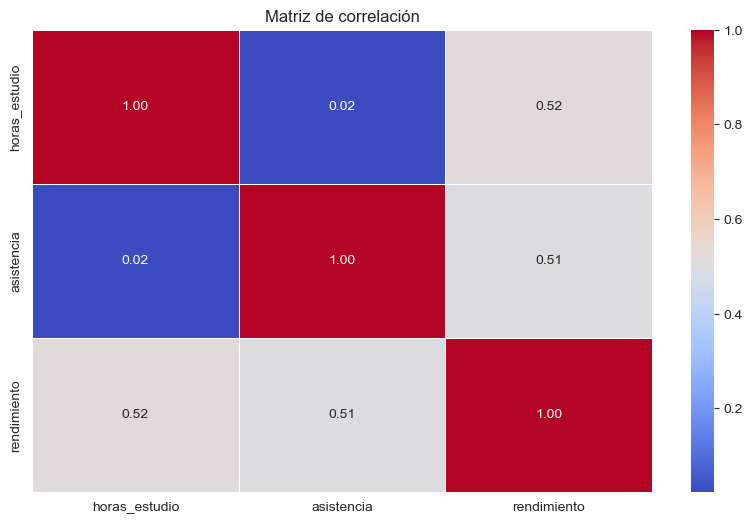

In [43]:
# calculamos la matriz de correlación
dataset_num = data.select_dtypes(include=['int64', 'float64'])
corr_matrix = dataset_num.corr()

print(corr_matrix)

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de correlación')
plt.show()

<font size="4">

La matriz de correlación muestra cómo se relacionan las variables `horas_estudio`, `asistencia` y `rendimiento`. Se observa una correlación positiva moderada entre `horas_estudio` y `rendimiento` (0.524), lo que indica que, en general, a mayor cantidad de horas de estudio, mejor es el rendimiento académico. De forma similar, la variable `asistencia` también presenta una correlación positiva moderada con el rendimiento (0.506), lo que sugiere que los estudiantes que asisten más a clase tienden a obtener mejores resultados. Sin embargo, la correlación entre `horas_estudio` y `asistencia` es prácticamente nula (0.023), lo que implica que estos dos comportamientos son independientes: asistir a clase no está relacionado con estudiar más o menos horas, y viceversa. En conjunto, se puede concluir que tanto las horas de estudio como la asistencia a clase son factores relevantes para el rendimiento académico, y que aportan información complementaria al no estar correlacionados entre sí.


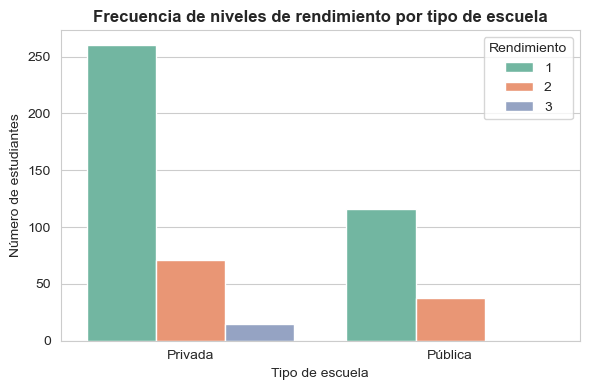

In [44]:
plt.figure(figsize=(6, 4))
sns.countplot(
    x='tipo_escuela',
    hue='rendimiento',
    data=data,
    palette='Set2'
)
plt.title("Frecuencia de niveles de rendimiento por tipo de escuela", fontsize=12, fontweight="bold")
plt.xlabel("Tipo de escuela")
plt.ylabel("Número de estudiantes")
plt.legend(title="Rendimiento")
plt.tight_layout()
plt.show()


<font size="4">

Con base en el gráfico de barras que muestra la **frecuencia de niveles de rendimiento por tipo de escuela**, se puede concluir lo siguiente:

Los estudiantes de escuelas **privadas** presentan en su mayoría un **rendimiento nivel 1**, seguido por un grupo menor en el nivel 2 y una pequeña proporción en el nivel 3. Esto indica que en escuelas privadas predominan los estudiantes con mejor rendimiento.

En las escuelas **públicas**, también se observa que la mayor parte del alumnado se concentra en el **rendimiento nivel 1**, pero con una proporción menor comparada con la privada. Además, hay menos estudiantes en los niveles 2 y prácticamente ninguno en el nivel 3.

En resumen, **los estudiantes de escuelas privadas tienden a tener un rendimiento más alto que los de escuelas públicas**, ya que no solo son más numerosos en el nivel 1, sino que también hay presencia en todos los niveles (1, 2 y 3), mientras que en las escuelas públicas hay una menor representación global y prácticamente nula en el nivel más bajo de rendimiento.

### Preprocesamiento y División del dataset

Una vez hemos hecho el EDA, vamos a realizar el procesamiento de las columnas del dataset con la finalidad de ajustar los datos a como el modelo los recibe. Para ello, vamos a dividir el procesamiento en dos partes:
- Variables numéricas: aplicaremos un StandarScaler para convertir los datos a un formato normalizado, para que el modelo no tenga en cuenta valores muy altos de algunas variables y, de esta manera, todas las columnas sean iguales.
- Variables categóricas: Aplicaremos un OneHotEncoding.

Además, realizaremos la división del dataset en conjunto de entrenamiento y conjunto de test.

In [45]:
# division del dataset
x = data[["horas_estudio", "asistencia" ,"tipo_escuela", "extraescolares"]]
y = data["rendimiento"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((400, 4), (400,), (100, 4), (100,))

In [46]:
from sklearn.preprocessing import OrdinalEncoder

# definimos el preprocesador
var_cualitativas = data.select_dtypes(include=['category']).columns.tolist()
var_cuantitativas = data.select_dtypes(include=['int64', 'float64']).drop(columns=['rendimiento']).columns.tolist()

preprocesador = ColumnTransformer([
    ('scaler', StandardScaler(), var_cuantitativas),
    ('ordinal_encoder', OrdinalEncoder(), var_cualitativas)]    
)

print(f"Columnas cualitativas: {var_cualitativas}")
print(f"Columnas cuantitativas: {var_cuantitativas}")

Columnas cualitativas: ['tipo_escuela', 'extraescolares']
Columnas cuantitativas: ['horas_estudio', 'asistencia']


In [47]:
from sklearn import set_config
set_config(display='diagram')
preprocesador

ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                 ['horas_estudio', 'asistencia']),
                                ('ordinal_encoder', OrdinalEncoder(),
                                 ['tipo_escuela', 'extraescolares'])])

<font size="4">

### Definimos el modelo, lo entrenamos y calculamos sus métricas

Naive Bayes es un algoritmo de clasificación basado en el teorema de Bayes, que asume que las características del conjunto de datos son independientes entre sí (de ahí lo de "naive" o ingenuo). Esto significa que la presencia o ausencia de una característica no afecta a las otras, lo cual simplifica mucho los cálculos. Utiliza probabilidades condicionales para predecir la clase a la que pertenece un nuevo dato, calculando la probabilidad de que ese dato pertenezca a cada clase posible y eligiendo la que tenga mayor probabilidad. Es muy eficiente, fácil de implementar y funciona bien en problemas de texto, como clasificación de correos o análisis de sentimientos, aunque su supuesto de independencia rara vez se cumple totalmente en la práctica.


In [48]:
# definimos el modelo
modelo = GaussianNB()

# definimos el pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocesador),
    ('model', modelo)
])

# entrenamos el modelo
pipeline.fit(x_train, y_train)

# calculamos las predicciones
y_pred = pipeline.predict(x_test)

In [49]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy:  {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall:    {recall:.3f}")
print(f"F1-score:  {f1:.3f}")

Accuracy:  0.910
Precision: 0.951
Recall:    0.910
F1-score:  0.914


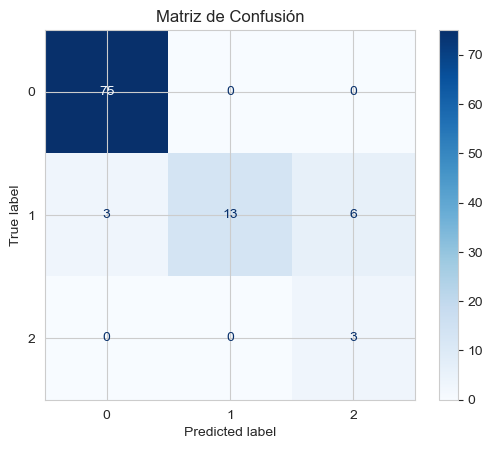

In [50]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues) 
plt.title("Matriz de Confusión")
plt.show()

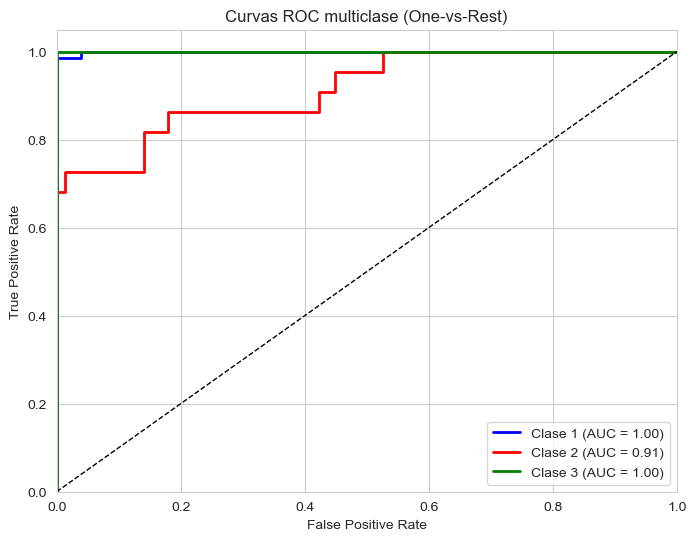

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Paso 1: Binarizamos las etiquetas para multiclase
clases = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=clases)

# Paso 2: Obtener probabilidades para todas las clases
y_score = pipeline.predict_proba(x_test)

# Paso 3: Calcular ROC para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(clases)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Paso 4: Dibujar las curvas ROC
plt.figure(figsize=(8,6))
colors = ['blue', 'red', 'green', 'orange', 'purple']  # Pon tantos colores como clases tengas

for i, color in zip(range(len(clases)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Clase {clases[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curvas ROC multiclase (One-vs-Rest)')
plt.legend(loc="lower right")
plt.show()
